## Aim of this project is to develop a model for patients to understand if they need Diabetic Medication or not

by Tuncer Sivri 2200765007 and Kemal Şahin 2200765021

In [12]:
#Used libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
sns.set_style("dark")
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [13]:
df = pd.read_csv("diabetic_data.csv")

### Check for uniques

In [14]:
#So much unique count 
print(f"Unique count encounter_id = {len(df.encounter_id.unique().tolist())}") # all rows are unique so it's not usable

print(f"Unique count patient_nbr = {len(df.patient_nbr.unique().tolist())}") # most of the rows are unique so it's not usable

print(f"Unique count num_lab_procedures = {len(df.num_lab_procedures.unique().tolist())}")


Unique count encounter_id = 101766
Unique count patient_nbr = 71518
Unique count num_lab_procedures = 118


### Visualization of the attributes

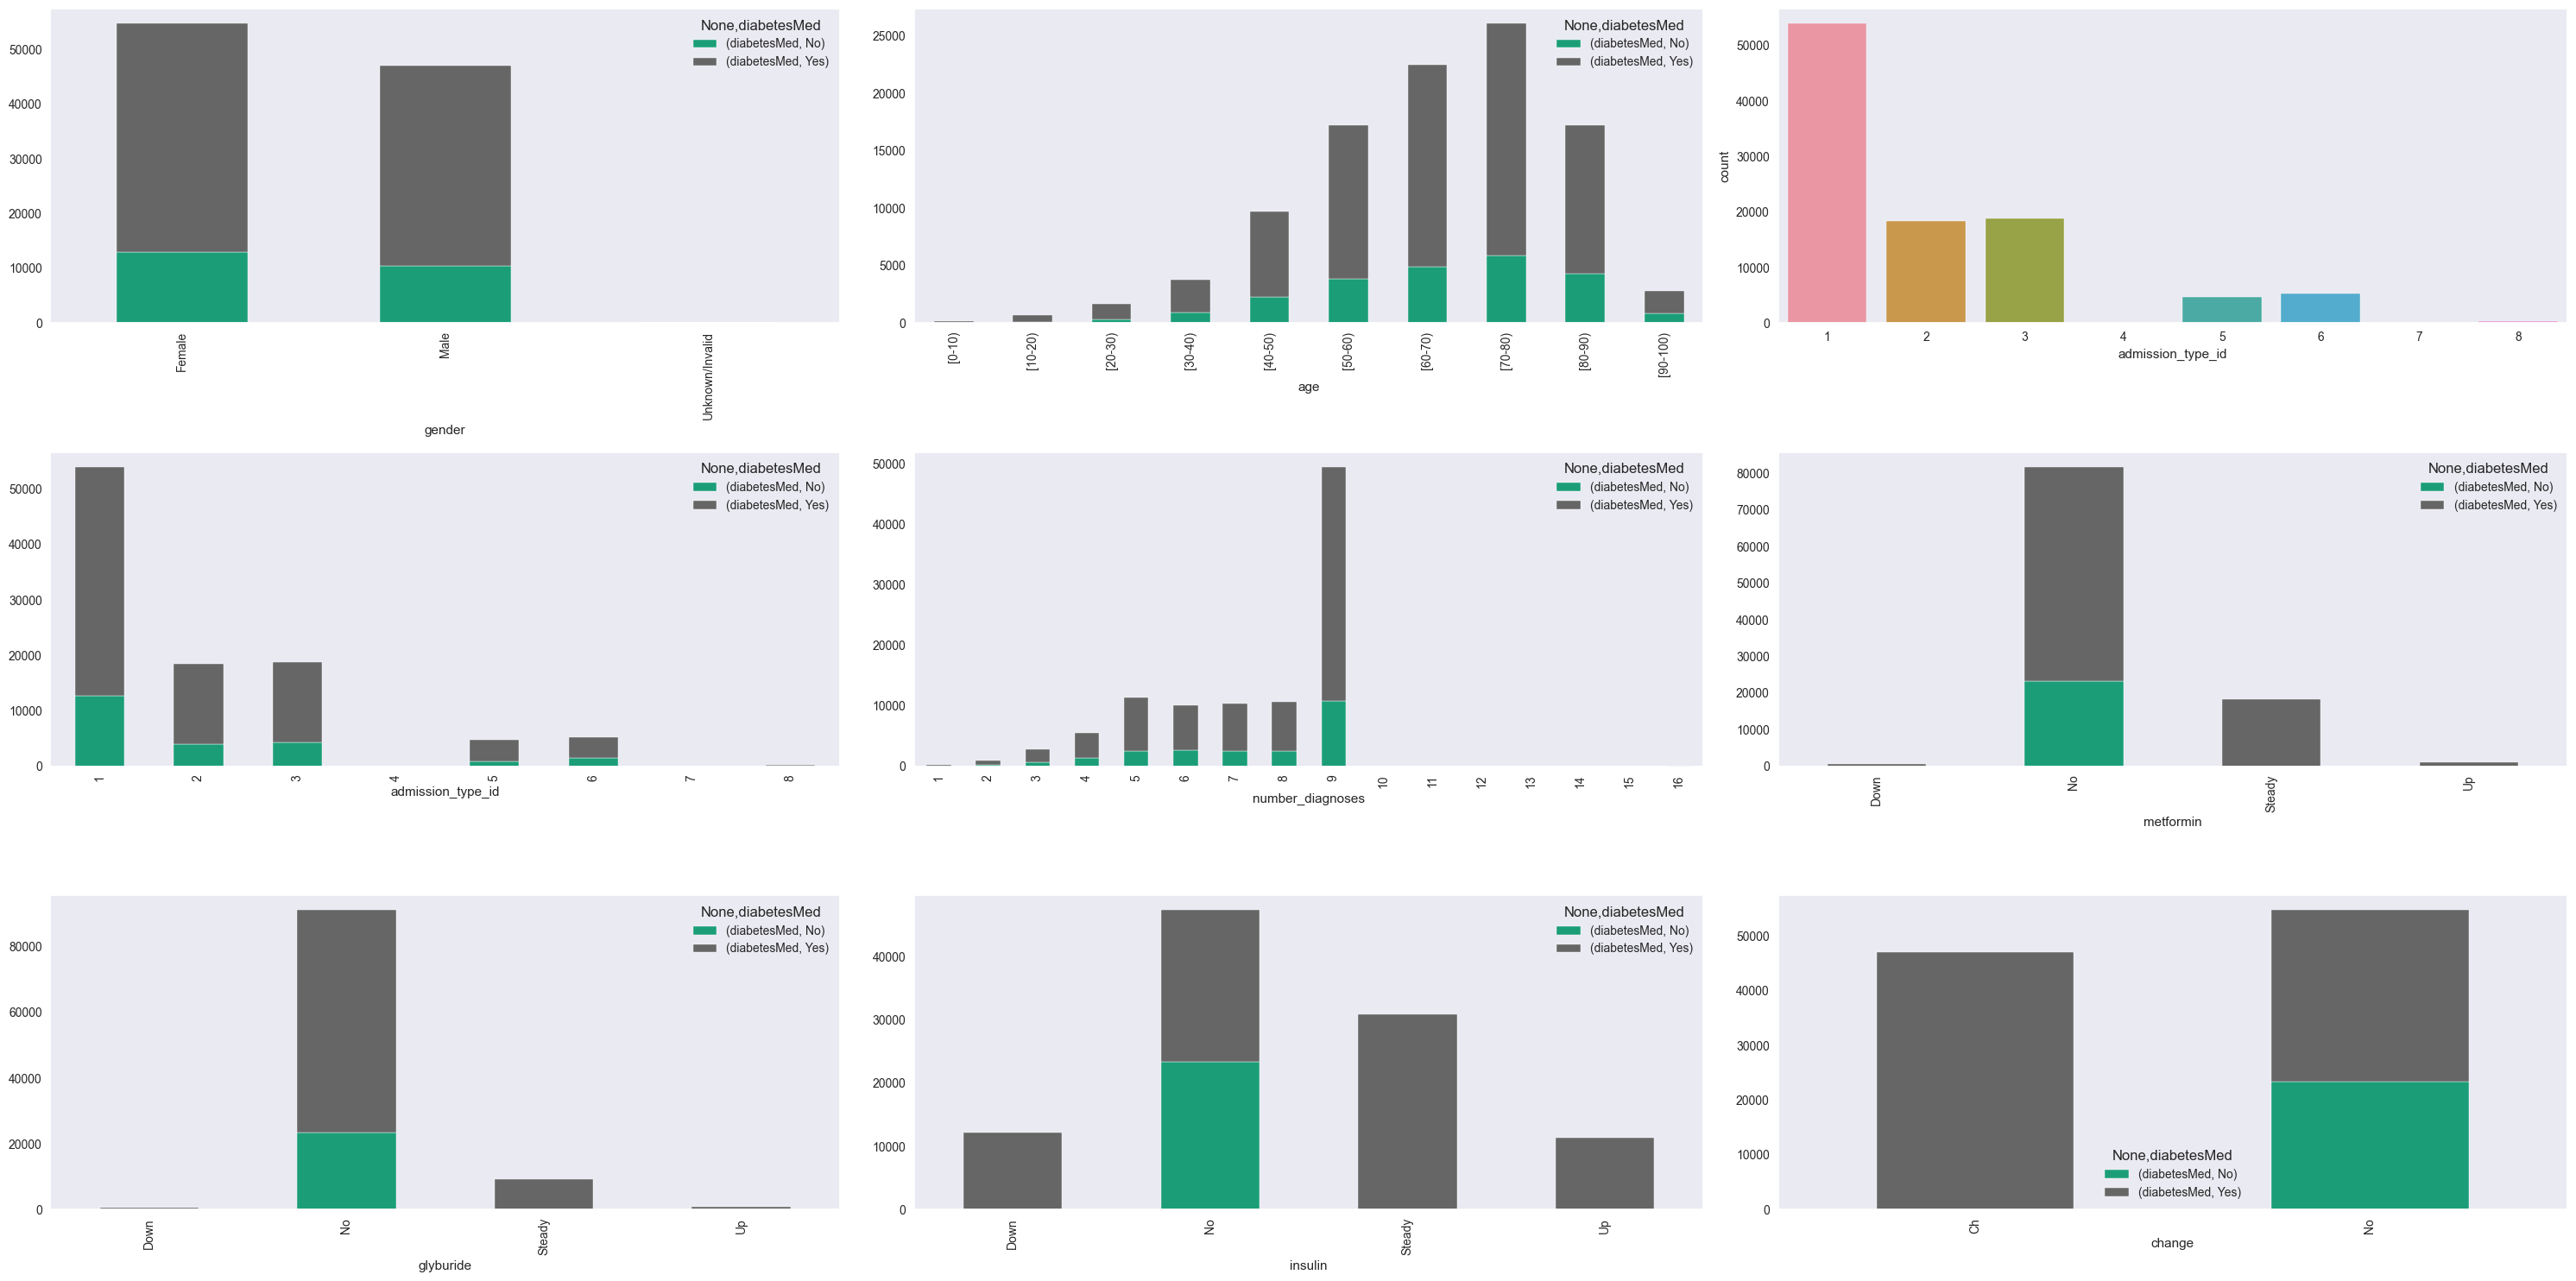

In [15]:
fig, axs = plt.subplots(ncols=3,nrows = 3,figsize = (30,15))

temp = df[["gender","diabetesMed"]].pivot_table(index='gender', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[0][0])

temp = df[["age","diabetesMed"]].pivot_table(index='age', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[0][1])

sns.countplot(data=df,x="admission_type_id",ax=axs[0][2])

df[["admission_type_id","diabetesMed"]].pivot_table(index='admission_type_id', columns=df["diabetesMed"], aggfunc='count').plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[1][0])

temp = df[["number_diagnoses","diabetesMed"]].pivot_table(index='number_diagnoses', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[1][1])

temp = df[["metformin","diabetesMed"]].pivot_table(index='metformin', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[1][2])

temp = df[["glyburide","diabetesMed"]].pivot_table(index='glyburide', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[2][0])

temp = df[["insulin","diabetesMed"]].pivot_table(index='insulin', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[2][1])

temp = df[["change","diabetesMed"]].pivot_table(index='change', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[2][2])

plt.tight_layout()
plt.show()

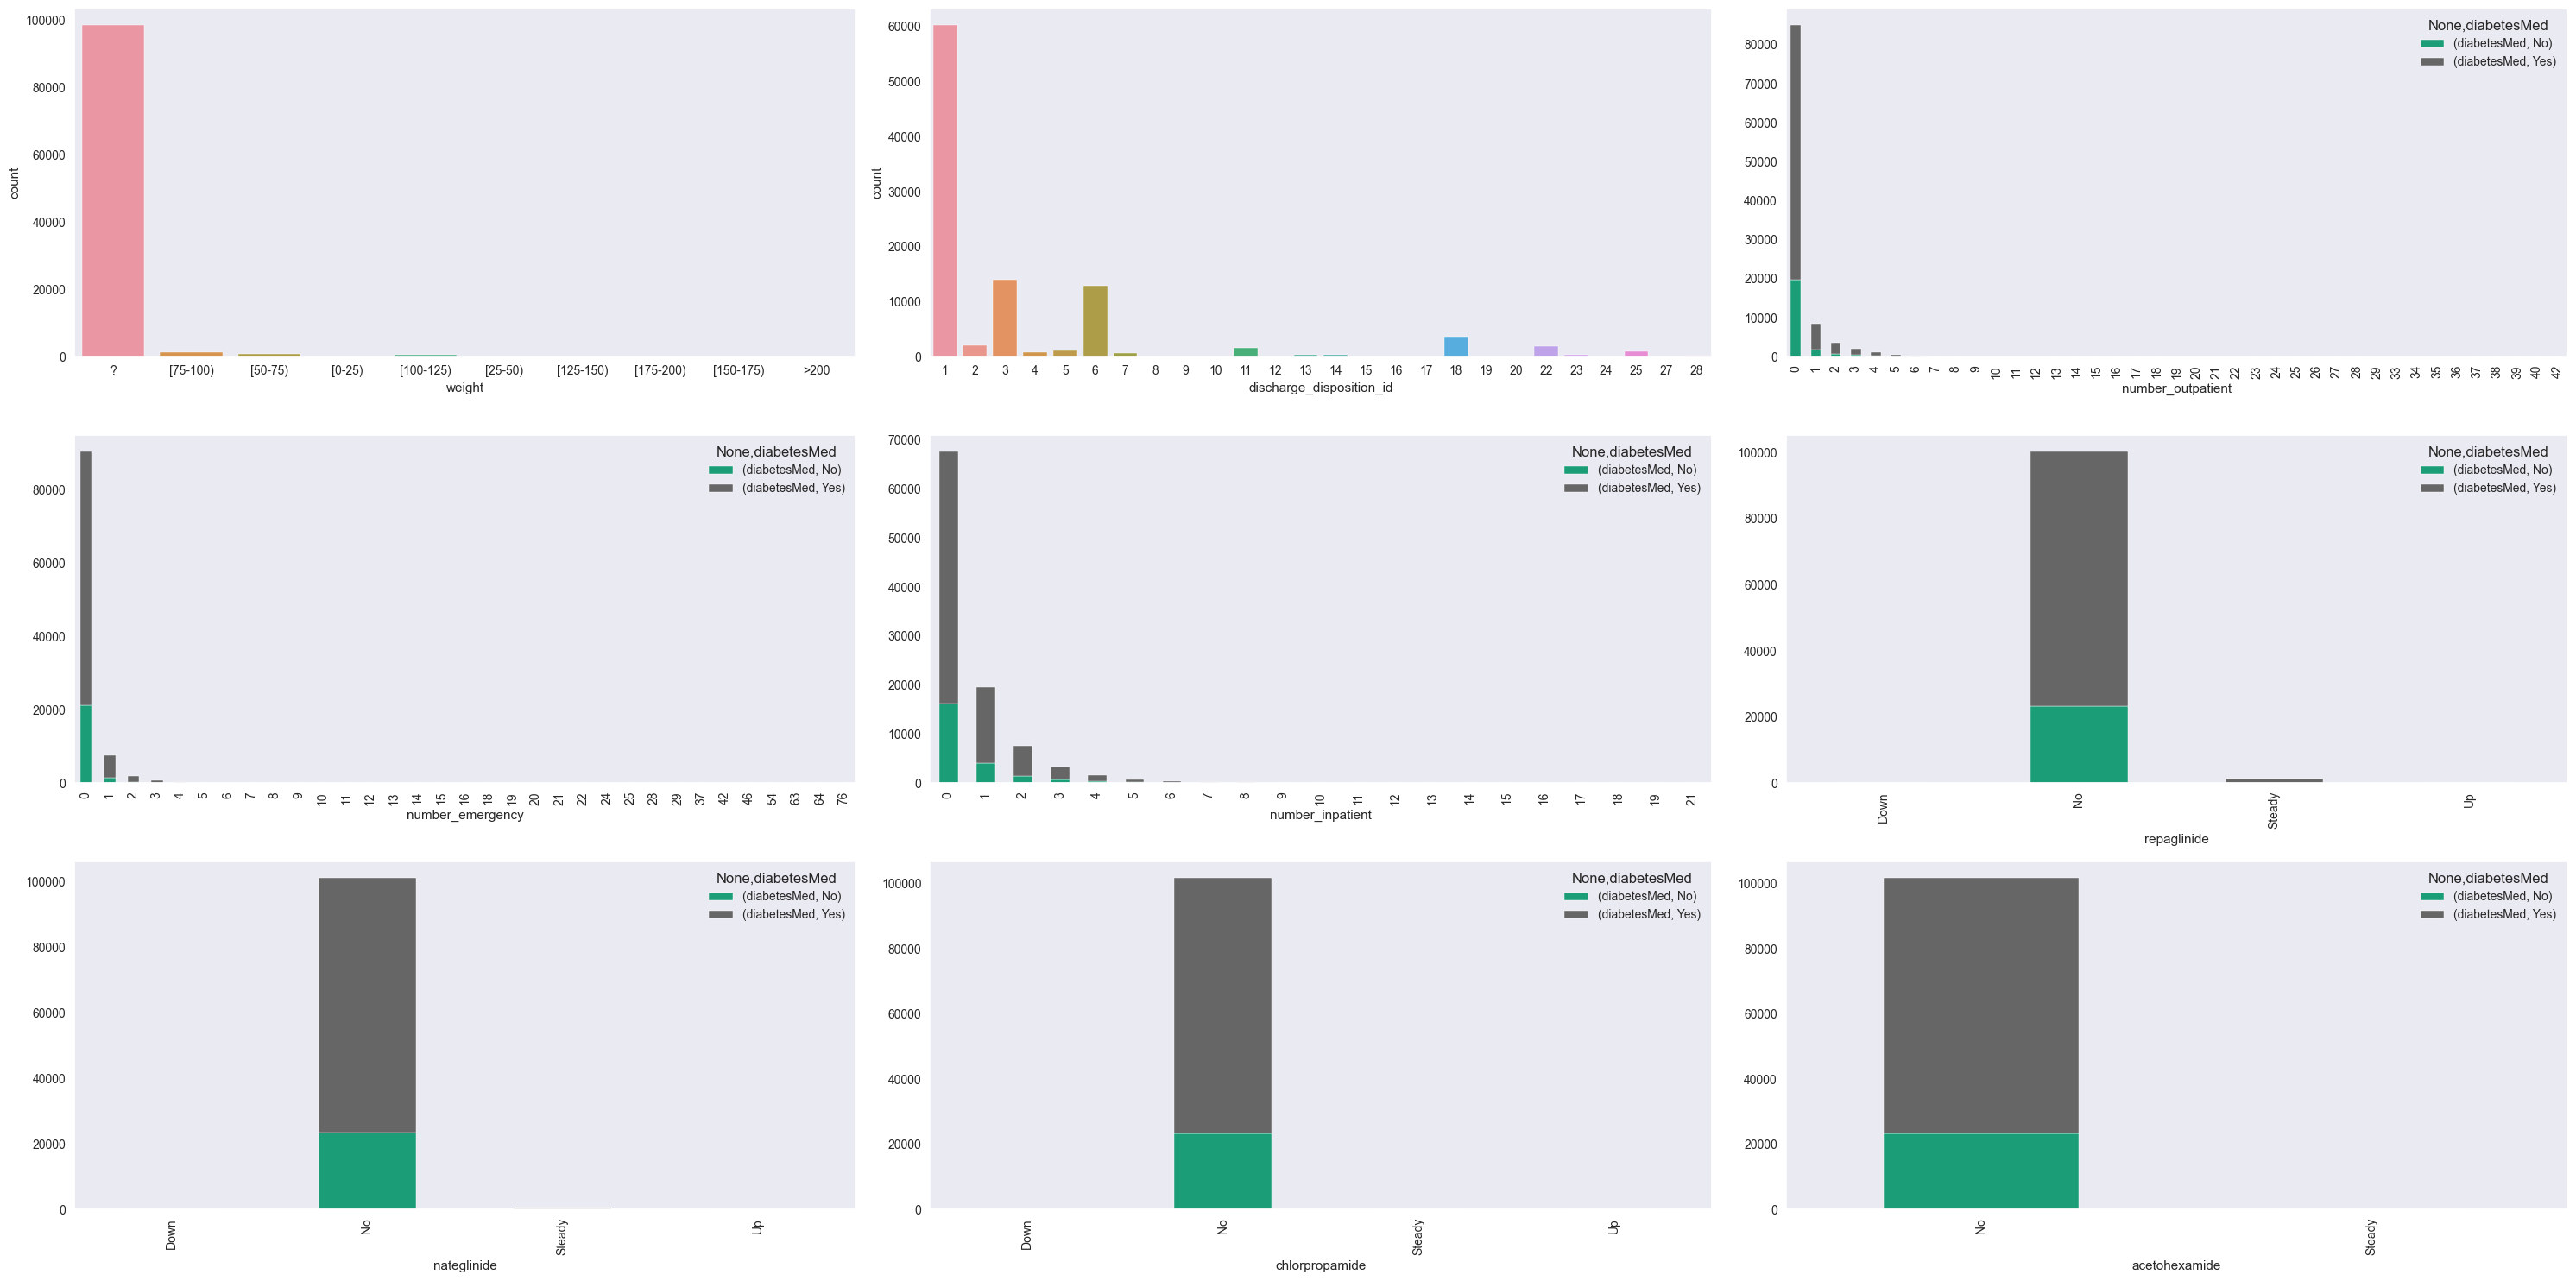

In [16]:
# very biased datas
fig, axs = plt.subplots(ncols=3,nrows = 3,figsize = (30,15))

sns.countplot(data=df,x="weight",ax=axs[0][0])

sns.countplot(data=df,x="discharge_disposition_id",ax=axs[0][1])

temp = df[["number_outpatient","diabetesMed"]].pivot_table(index='number_outpatient', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[0][2])

temp = df[["number_emergency","diabetesMed"]].pivot_table(index='number_emergency', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[1][0])

temp = df[["number_inpatient","diabetesMed"]].pivot_table(index='number_inpatient', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[1][1])

temp = df[["repaglinide","diabetesMed"]].pivot_table(index='repaglinide', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[1][2])

temp = df[["nateglinide","diabetesMed"]].pivot_table(index='nateglinide', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[2][0])

temp = df[["chlorpropamide","diabetesMed"]].pivot_table(index='chlorpropamide', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[2][1])

temp = df[["acetohexamide","diabetesMed"]].pivot_table(index='acetohexamide', columns=df["diabetesMed"], aggfunc='count')
temp.plot(kind='bar', stacked=True,colormap="Dark2",ax=axs[2][2])

plt.tight_layout()
plt.show()

## Data Cleaning and Preprocessing

In [17]:
#dropping columns
df.drop("encounter_id",inplace=True,axis = 1) # too much unique column
df.drop("patient_nbr",inplace=True,axis = 1) # too much unique column
df.drop("num_lab_procedures",axis=1,inplace=True)# too much unique column
df.drop("admission_type_id",axis=1,inplace=True) # too much unique column
df.drop("diag_1",axis=1,inplace=True) #icd9 codes 
df.drop("diag_2",axis=1,inplace=True) #icd9 codes 
df.drop("diag_3",axis=1,inplace=True) #icd9 codes 
df.drop("metformin-pioglitazone",axis=1,inplace=True) #single column
df.drop("max_glu_serum",axis=1,inplace=True) #single column
df.drop("weight",axis=1,inplace=True) #we don't know most of the data so I will drop it
df.drop("discharge_disposition_id",axis=1,inplace=True) # There is no corrrelation so I will drop it
df.drop("admission_source_id",axis=1,inplace=True) #there is no correlation with diabetesmed
df.drop("payer_code",axis=1,inplace=True) #there is no correlation with diabetesmed
df.drop("medical_specialty",axis=1,inplace=True) # too much unique item (73)
df.drop("num_procedures",axis=1,inplace=True) # there is no correlation with diabetesmed all columns have %25 diabetes med
df.drop("num_medications",axis=1,inplace=True) # too much unique item (75)
df.drop("number_outpatient",axis=1,inplace=True) # too much unique item (39) and very biased
df.drop("number_emergency",axis=1,inplace=True) # too much unique item (33) and very biased
df.drop("number_inpatient",axis=1,inplace=True) # too much unique item (21) and very biased
df.drop("number_diagnoses",axis=1,inplace=True) # too much unique item (16) and very biased
df.drop("A1Cresult",axis=1,inplace=True) # too much none value
df.drop("repaglinide",axis=1,inplace=True) # very biased column
df.drop("nateglinide",axis=1,inplace=True) # very biased column
df.drop("chlorpropamide",axis=1,inplace=True) # very biased column
df.drop("glimepiride",axis=1,inplace=True) # very biased column
df.drop("acetohexamide",axis=1,inplace=True) # very biased column
df.drop("glipizide",axis=1,inplace=True) # very biased column
df.drop("glyburide",axis=1,inplace=True) # very biased column
df.drop("tolbutamide",axis=1,inplace=True) # very biased column
df.drop("pioglitazone",axis=1,inplace=True) # very biased column
df.drop("rosiglitazone",axis=1,inplace=True) # very biased column
df.drop("acarbose",axis=1,inplace=True) # very biased column
df.drop("miglitol",axis=1,inplace=True) # very biased column
df.drop("troglitazone",axis=1,inplace=True) # very biased column
df.drop("tolazamide",axis=1,inplace=True) # very biased column
df.drop("examide",axis=1,inplace=True) # single column
df.drop("citoglipton",axis=1,inplace=True) # single column
df.drop("glyburide-metformin",axis=1,inplace=True) # very biased column
df.drop("glipizide-metformin",axis=1,inplace=True) # very biased column
df.drop("metformin-rosiglitazone",axis=1,inplace=True) # very biased column
df.drop("glimepiride-pioglitazone",axis=1,inplace=True) # very biased column

After dropping useless columns that we stated above why, we are left with our cleaned data which is ready for preprocess

### Variable descriptions for cleaned data

* **Gender**:  Nominal,	Values: male, female, and unknown/invalid(We dropped unknown/invalid because there was only 3 cases)

* **Age**: Nominal,	Grouped in 10-year intervals: (0, 10), (10, 20), …, (90, 100)

* **Race**:	Nominal, Values: Caucasian, Asian, African American, Hispanic, and other

* **Time in hospital**:	Numeric, Integer number of days between admission and discharge

* **Metformin**: Nominal,the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

* **Insulin**: Nominal,the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

* **Change**: Nominal,	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

* **Readmitted**:	Nominal, Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.

* **DiabetesMed**: Nominal, Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”


In [18]:
df = df[['gender', 'age', 'race', 'time_in_hospital', 'metformin', 'insulin', 'readmitted', 'change',"diabetesMed"]] # reordering columns

### Dropping null values


In [19]:
df.drop(df[df['race'] == '?'].index,axis=0,inplace = True) 
df.drop(df[df['gender'] == 'Unknown/Invalid'].index,axis=0,inplace = True)

#### We binary encoded attributes having 2 uniques with Label Encoder and One hot encoded attributes having more than 2 uniques with get_dummies function.

In [20]:
le = preprocessing.LabelEncoder()
le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])

le.fit(df['diabetesMed'])
df['diabetesMed'] = le.transform(df['diabetesMed'])

le.fit(df['change'])
df['change'] = le.transform(df['change'])

df

data =  pd.get_dummies(data=df)
data = data[['gender', 'time_in_hospital', 'change', 'age_[0-10)',
       'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'metformin_Down', 'metformin_No',
       'metformin_Steady', 'metformin_Up', 'insulin_Down', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'readmitted_<30', 'readmitted_>30',
       'readmitted_NO','diabetesMed']]

data.head()

,gender,time_in_hospital,change,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),...,metformin_Steady,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted_<30,readmitted_>30,readmitted_NO,diabetesMed
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,2,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,1,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1


#### Because we have multidimensional data we used PCA to reduce the dimensions for clustering analysis

In [21]:
pca = PCA(n_components = 2) 
x_principal = pca.fit_transform(data) 
x_principal = pd.DataFrame(x_principal) 
x_principal.columns = ['P1', 'P2'] 
x_principal
#trying to find how many different cases we have

,P1,P2
0,-3.429152,1.081139
1,-1.361093,-0.721324
2,-2.417962,0.592807
3,-2.380221,-0.562458
4,-3.392553,-0.771613
...,...,...
99487,-1.362878,-1.137034
99488,0.606165,-0.151682
99489,-3.378310,-0.927322
99490,5.630139,-0.296397


### Kmeans algorithm for clustering analysis

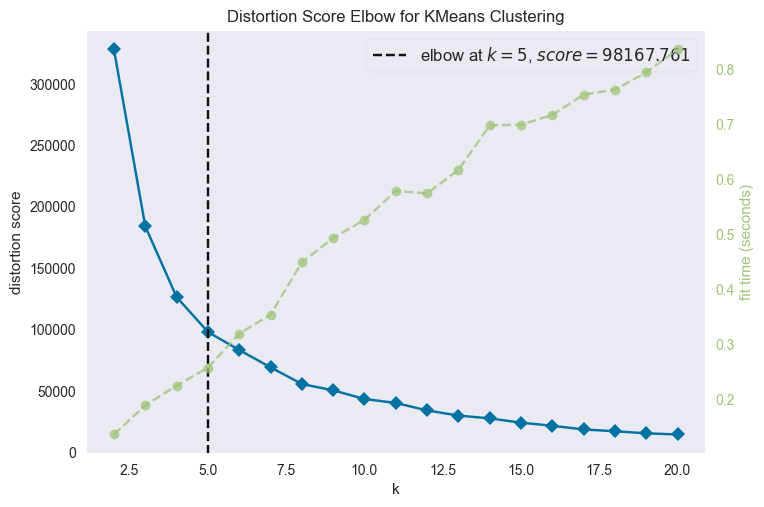

<Figure size 1200x1200 with 0 Axes>

In [22]:
kmeans = KMeans(random_state=40)
elbow_graph = KElbowVisualizer(KMeans(), k=20)
elbow_graph.fit(x_principal)
plt.figure(figsize=(12,12))
elbow_graph.show()
plt.show()

### Here we can see our 5 clusters for our PCA data

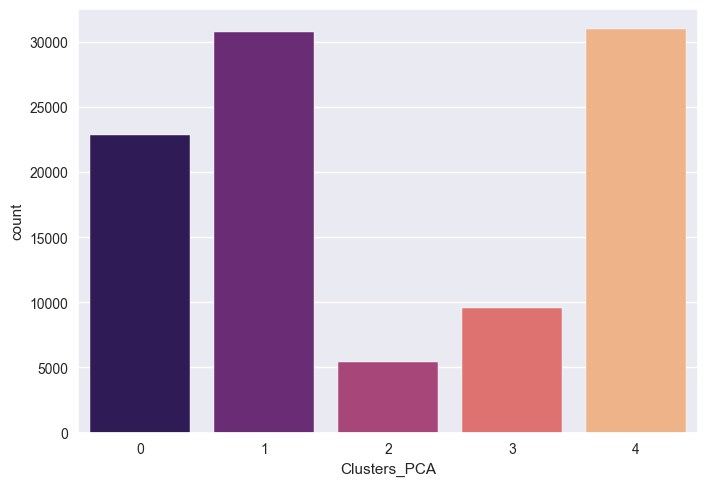

In [23]:
data2 = data.copy()
kmeans = KMeans(n_clusters=5, random_state=40)
predictions = kmeans.fit_predict(x_principal)
data2["Clusters_PCA"] = predictions
sns.set_style("darkgrid")
sns.countplot(x = data2["Clusters_PCA"],palette='magma')

plt.show()

## Predictive Modelling
#### We wanted to use 3 different classification algorithms they are:
#### 1. **KNN Classifier**
#### 2. **Logistic Regression**
#### 3. **Random Forest Classifier***

#### Data train , test splitting and scaling process

In [24]:
X = data[['gender', 'time_in_hospital', 'change', 'age_[0-10)',
       'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'metformin_Down', 'metformin_No',
       'metformin_Steady', 'metformin_Up', 'insulin_Down', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'readmitted_<30', 'readmitted_>30',
       'readmitted_NO']]
y = data["diabetesMed"]
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.3, shuffle=True)

In [25]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Model Evaluation and Visualizations

## 1. KNN Classifier

#### We first wanted to try KNN classifier although it is a high computation cost algorithm because it is good for where predictions are not requested frequently but where accuracy is important. Surely accuracy is probably the most important case in Health.

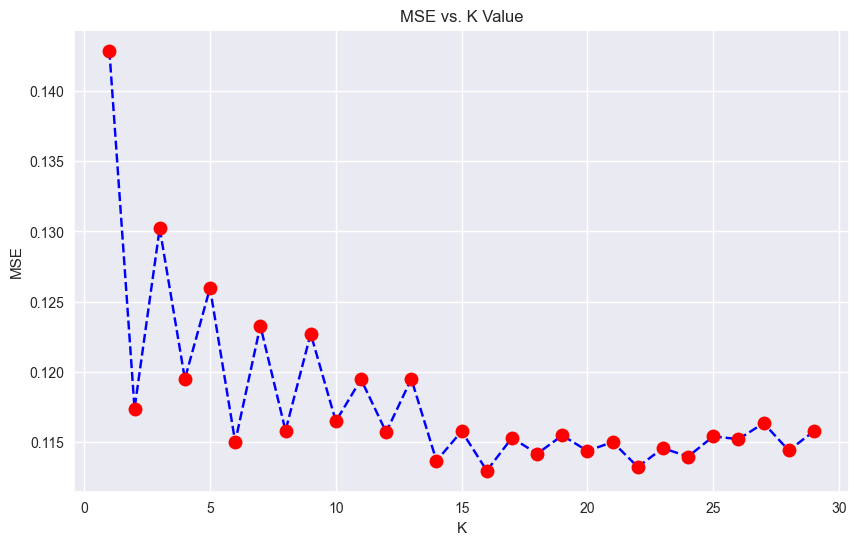

Minimum error:- 0.11297239346019834 at K = 16


In [26]:
error_rate = []

for i in range(1,30):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean_squared_error(pred_i,y_test))
k = error_rate.index(min(error_rate)) + 1
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("MSE vs. K Value")
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)

*******************
 16 nn score: 0.8870276065398016 


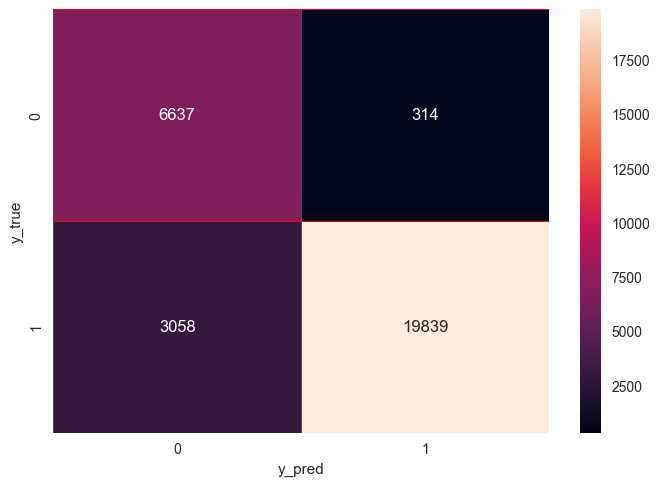

In [27]:
knn = neighbors.KNeighborsClassifier(n_neighbors=k) ## k = 16
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

print("*******************")
print(" {} nn score: {} ".format(16,knn.score(X_test,y_test)))

y_pred = knn.predict(X_test)
y_true=y_test

cm= confusion_matrix(y_true, y_pred)

f, ax =plt.subplots()

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### In the and we can see  that we have an accuracy of %88.65 with knn algorithm and largest error is False Negative values from our Confusion Matrix

## 2. Logistic Regression

#### We also wanted to try Logistic Regression because it is faster than KNN and It is very easy to realize and achieves very good performance with linearly separable classes

Accuracy score:  0.8932591798445457


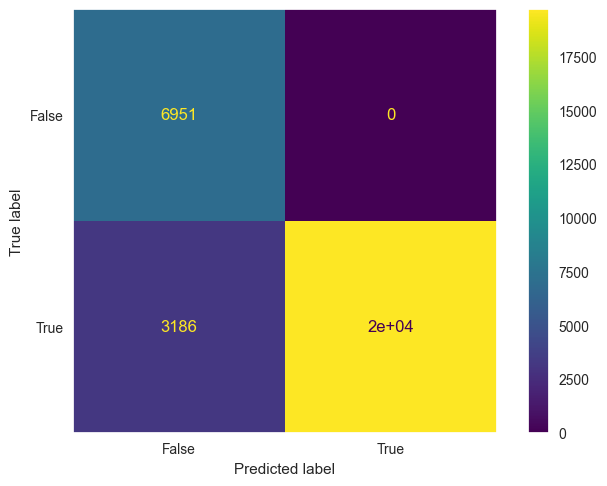

In [28]:
#Logistic Regression

# Fitting logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


# Predicting the test results
y_pred = classifier.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

#confusion matrix for logistic regression 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
sns.set_style("dark")
cm_display.plot()
plt.show()

### In the and we can see  that we have an accuracy of %89.32 with Logistic Regression and largest error is False Negative values from our Confusion Matrix. it also had zero false positive values.

## 3. Random Forest Classifier

#### Finally we wanted to try Random Forest Classifier because it produces good predictions that can be understood easily and It can handle large datasets efficiently(our dataset is quite large so it makes sense). it also provides a high level of accuracy in predicting outcomes.


ACCURACY OF THE MODEL:  0.889339319217368


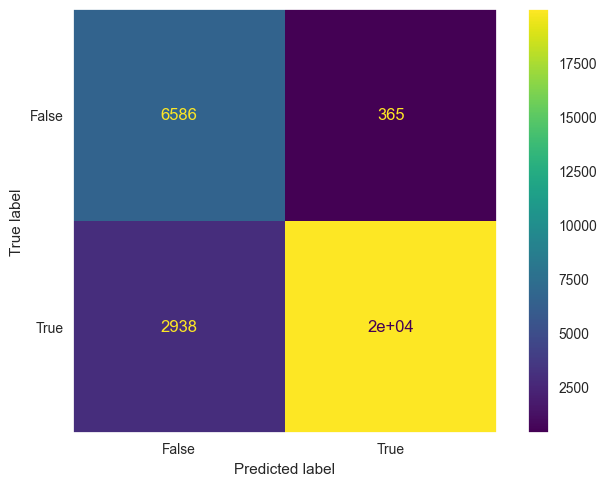

In [29]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 128)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
sns.set_style("dark")
cm_display.plot()
plt.show()

### In the and we can see  that we have an accuracy of %88.92 with  Random Forest Classifier and largest error is False Negative values from our Confusion Matrix

## PR Curves for our algorithms 

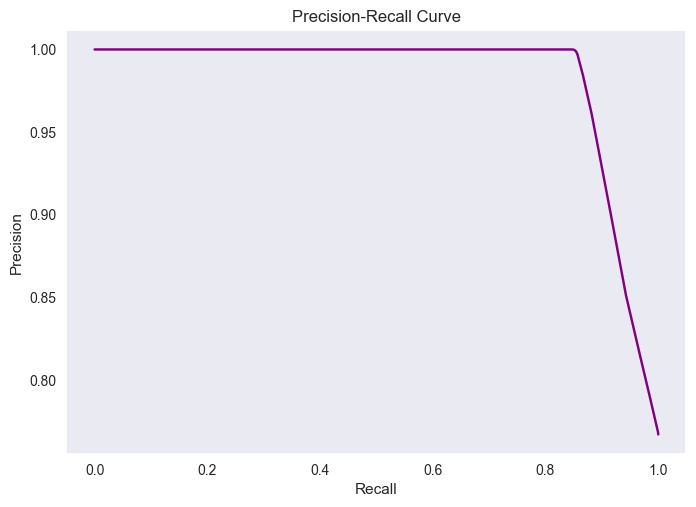

In [30]:
#calculate precision and recall for knn

knn.fit(X_train,y_train)
y_score = knn.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

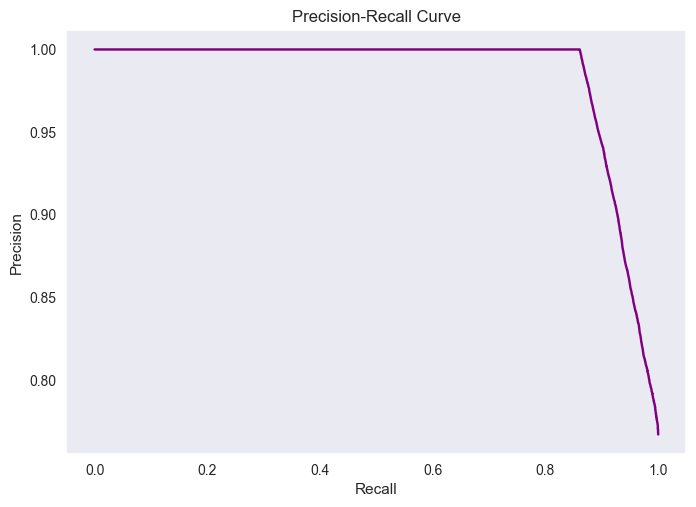

In [31]:
#calculate precision and recall for logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

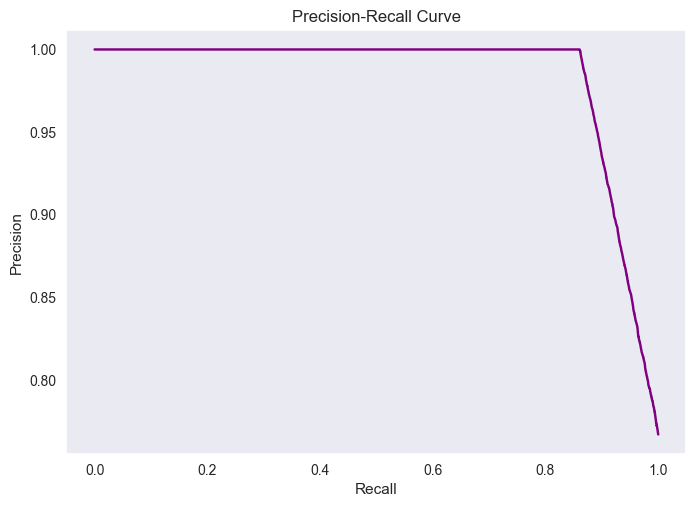

In [32]:
#calculate precision and recall for RF classifier
clf = RandomForestClassifier(n_estimators = 128)  

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## We can see that all of our PR currves are near perfect and very close to each other